In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [2]:
df=pd.read_csv('Holiday_Package.csv')

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
df.shape

(872, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [6]:
df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


<AxesSubplot:>

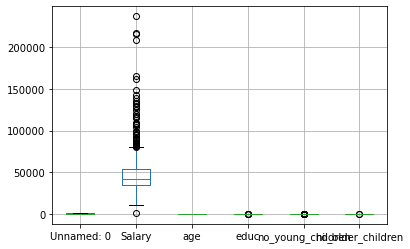

In [7]:
df.boxplot()

In [8]:
df['Holliday_Package'].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [9]:
df['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [10]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educ', ylabel='count'>

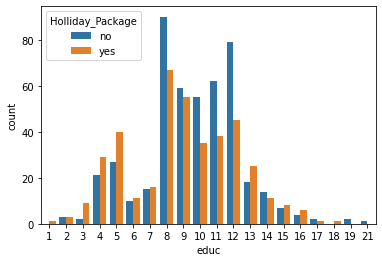

In [14]:
sns.countplot(df['educ'],hue=df['Holliday_Package'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_young_children', ylabel='count'>

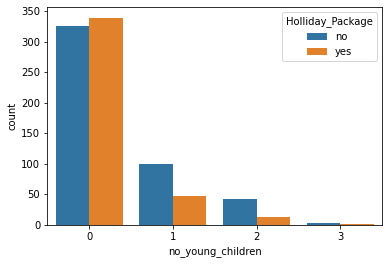

In [15]:
sns.countplot(df['no_young_children'],hue=df['Holliday_Package'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_older_children', ylabel='count'>

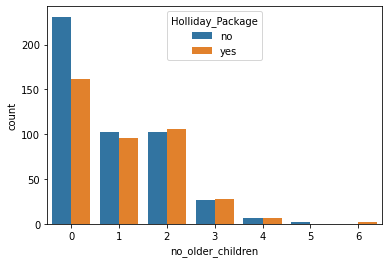

In [16]:
sns.countplot(df['no_older_children'],hue=df['Holliday_Package'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='foreign', ylabel='count'>

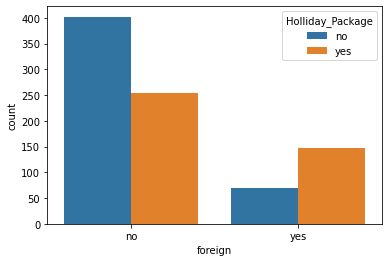

In [17]:
sns.countplot(df['foreign'],hue=df['Holliday_Package'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

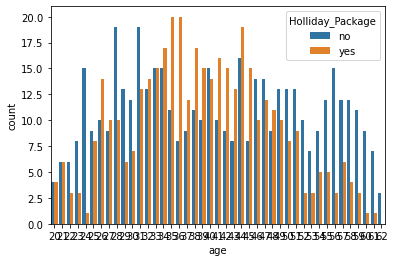

In [18]:
sns.countplot(df['age'],hue=df['Holliday_Package'])

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [20]:
df['foreign']=LE.fit_transform(df['foreign'])
df['Holliday_Package']=LE.fit_transform(df['Holliday_Package'])
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

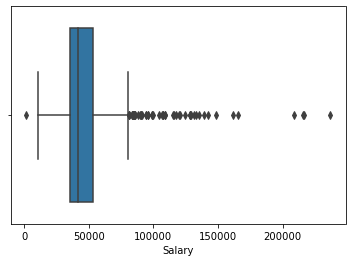

In [21]:
sns.boxplot(df['Salary'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

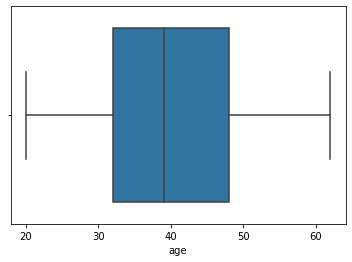

In [22]:
sns.boxplot(df['age'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='educ'>

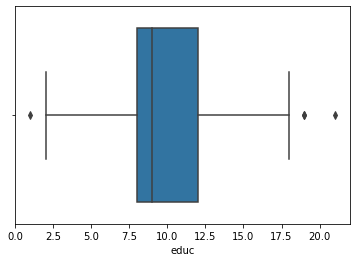

In [23]:
sns.boxplot(df['educ'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_young_children'>

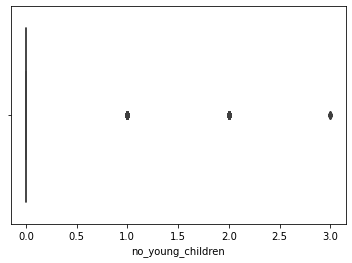

In [24]:
sns.boxplot(df['no_young_children'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_older_children'>

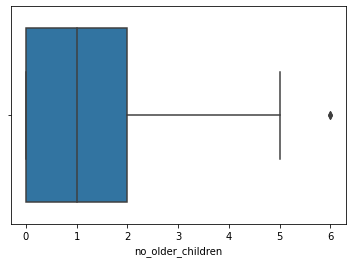

In [25]:
sns.boxplot(df['no_older_children'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

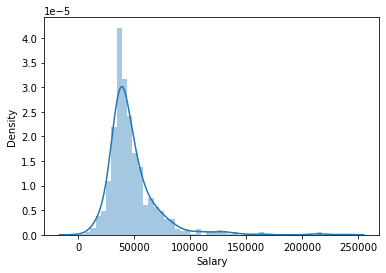

In [26]:
sns.distplot(df['Salary'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

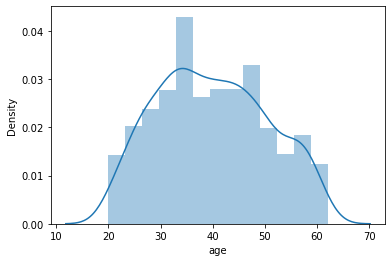

In [27]:
sns.distplot(df['age'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educ', ylabel='Density'>

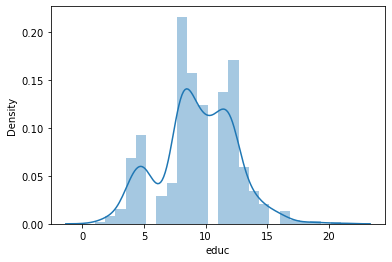

In [28]:
sns.distplot(df['educ'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_young_children', ylabel='Density'>

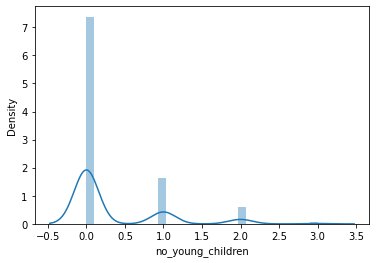

In [29]:
sns.distplot(df['no_young_children'])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='no_older_children', ylabel='Density'>

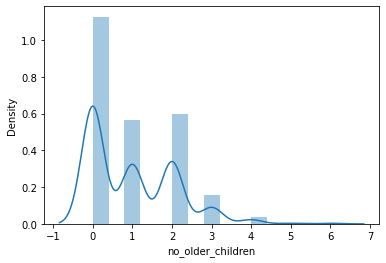

In [30]:
sns.distplot(df['no_older_children'])

In [31]:
df['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [32]:
df['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

<AxesSubplot:>

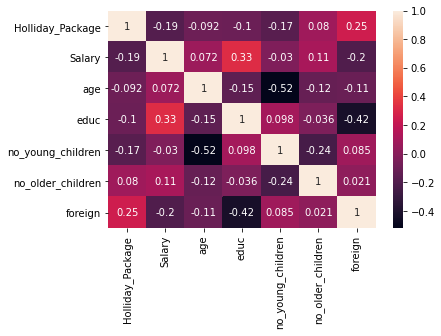

In [33]:
sns.heatmap(df.corr(),annot=True)

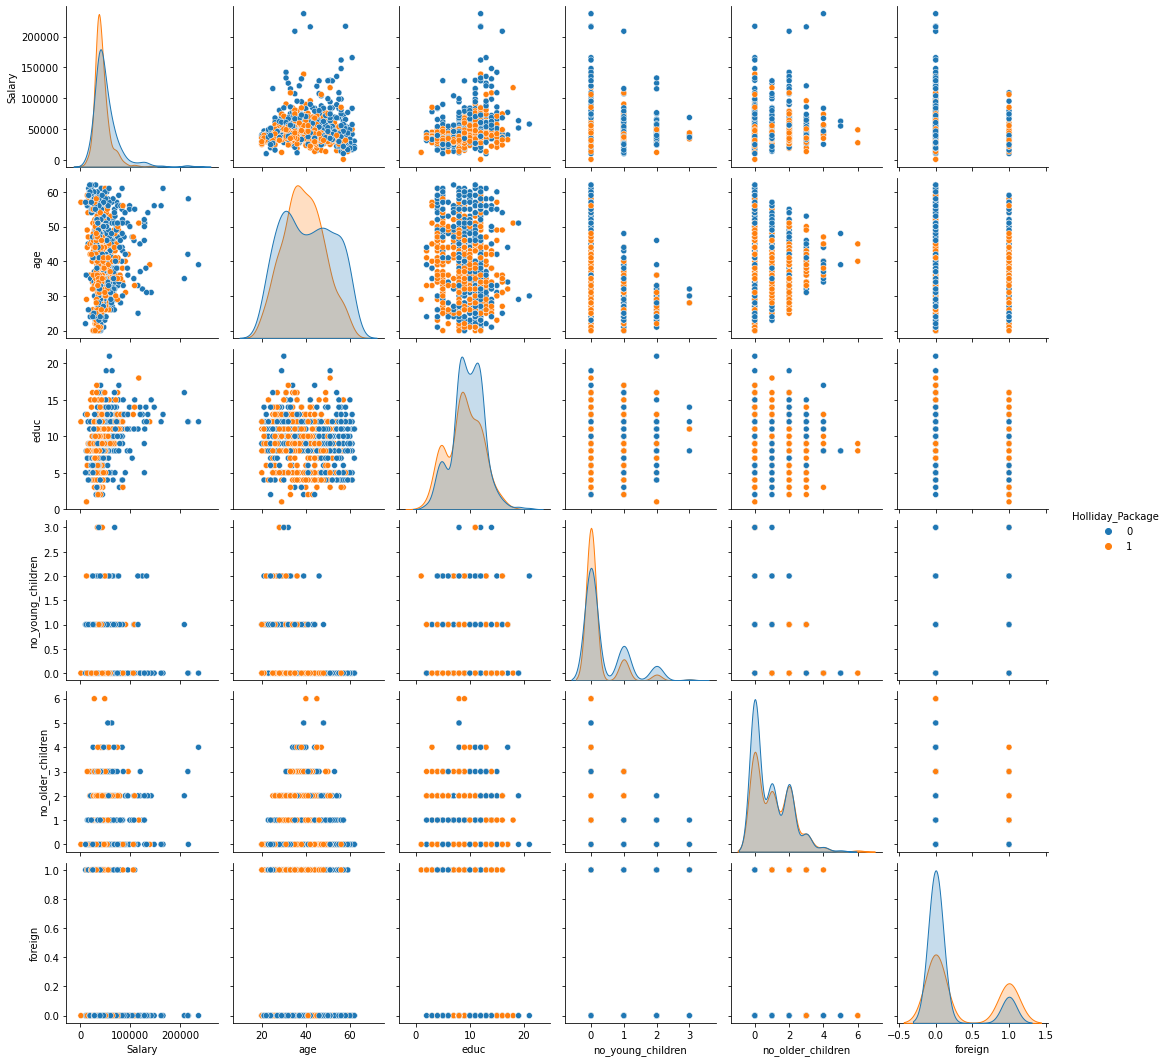

In [34]:
sns.pairplot(df,hue='Holliday_Package')

In [35]:
X=df.drop('Holliday_Package',axis=1)
Y=df.pop('Holliday_Package')

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

Linear Regression

In [37]:
model=LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train,Y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [38]:
Y_train_predict=model.predict(X_train)
Y_test_predict=model.predict(X_test)

In [39]:
model.score(X_train,Y_train)

0.6786885245901639

In [40]:
model.score(X_test,Y_test)

0.6374045801526718

0.7435193986001901


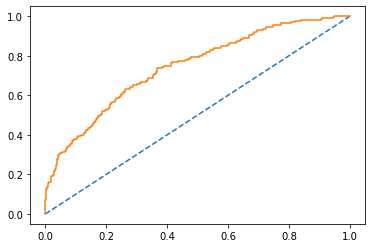

In [41]:
probs=model.predict_proba(X_train)
probs=probs[:,1]
auc=roc_auc_score(Y_train,probs)
print(auc)
fpr,tpr,thresholds=roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

In [42]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.69      0.57      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [43]:
confusion_matrix(Y_train,Y_train_predict)

array([[252,  74],
       [122, 162]], dtype=int64)

0.7046861184792218


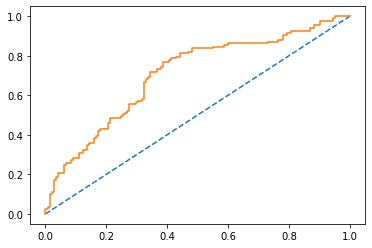

In [44]:
probs=model.predict_proba(X_test)
probs=probs[:,1]
auc=roc_auc_score(Y_test,probs)
print(auc)
fpr,tpr,thresholds=roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

In [45]:
print(classification_report(Y_test,Y_test_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [46]:
confusion_matrix(Y_test,Y_test_predict)

array([[102,  43],
       [ 52,  65]], dtype=int64)

GRID Search CV

In [47]:
grid={'penalty':['l1', 'l2', 'elasticnet', 'none'],
      'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      'tol':[0.001,0.0001]}
model=LogisticRegression(max_iter=100000,n_jobs=2)
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=3,n_jobs=-1,scoring='accuracy')

In [48]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.001, 0.0001]},
             scoring='accuracy')

In [49]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(max_iter=100000, n_jobs=2, solver='newton-cg', tol=0.001)


In [50]:
best_model = grid_search.best_estimator_

In [51]:
best_model.coef_

array([[-1.74320515e-05, -5.29508007e-02,  7.15166689e-02,
        -1.45899971e+00, -4.63494204e-02,  1.47629800e+00]])

0.7428497364555432


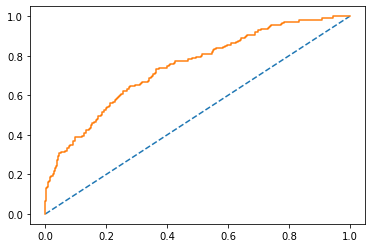

In [52]:
probs=best_model.predict_proba(X_train)
probs=probs[:,1]
auc=roc_auc_score(Y_train,probs)
print(auc)
fpr,tpr,thresholds=roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

0.7046861184792219


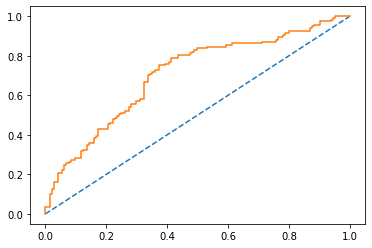

In [53]:
probs=best_model.predict_proba(X_test)
probs=probs[:,1]
auc=roc_auc_score(Y_test,probs)
print(auc)
fpr,tpr,thresholds=roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

In [54]:
Y_train_predict=best_model.predict(X_train)
Y_test_predict=best_model.predict(X_test)

In [55]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       326
           1       0.69      0.57      0.63       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.68       610



In [56]:
confusion_matrix(Y_train,Y_train_predict)

array([[252,  74],
       [121, 163]], dtype=int64)

In [57]:
print(classification_report(Y_test,Y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       145
           1       0.61      0.57      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.64      0.65      0.64       262



In [58]:
confusion_matrix(Y_test,Y_test_predict)

array([[102,  43],
       [ 50,  67]], dtype=int64)

LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
clf=LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)
model

LinearDiscriminantAnalysis()

0.7421152682968979


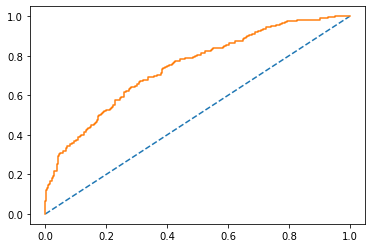

In [61]:
probs=model.predict_proba(X_train)
probs=probs[:,1]
auc=roc_auc_score(Y_train,probs)
print(auc)
fpr,tpr,thresholds=roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

0.7029177718832891


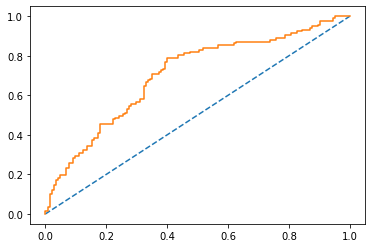

In [62]:
probs=model.predict_proba(X_test)
probs=probs[:,1]
auc=roc_auc_score(Y_test,probs)
print(auc)
fpr,tpr,thresholds=roc_curve(Y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr)

In [63]:
Y_train_predict=model.predict(X_train)
Y_test_predict=model.predict(X_test)

In [64]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [65]:
print(classification_report(Y_test,Y_test_predict))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [66]:
confusion_matrix(Y_train,Y_train_predict)

array([[252,  74],
       [126, 158]], dtype=int64)

In [67]:
confusion_matrix(Y_test,Y_test_predict)

array([[103,  42],
       [ 52,  65]], dtype=int64)

0.1 

Accuracy Score 0.4918
F1 Score 0.6461 

Confusion Matrix


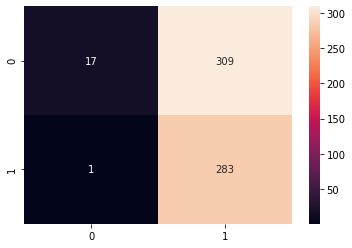

0.2 

Accuracy Score 0.5361
F1 Score 0.6627 

Confusion Matrix


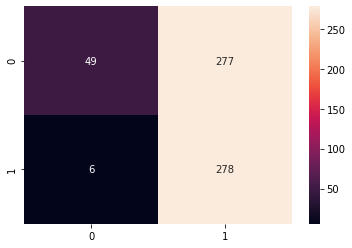

0.3 

Accuracy Score 0.5984
F1 Score 0.6738 

Confusion Matrix


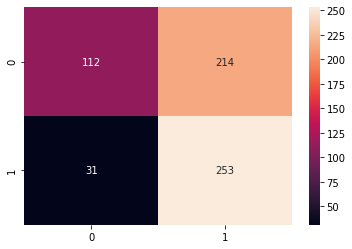

0.4 

Accuracy Score 0.6672
F1 Score 0.6762 

Confusion Matrix


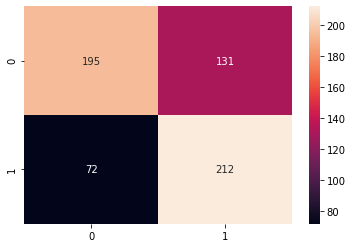

0.5 

Accuracy Score 0.6721
F1 Score 0.6124 

Confusion Matrix


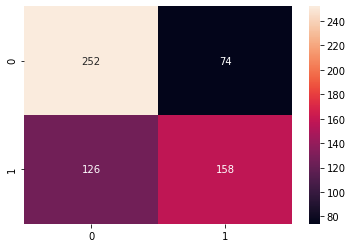

0.6 

Accuracy Score 0.659
F1 Score 0.5357 

Confusion Matrix


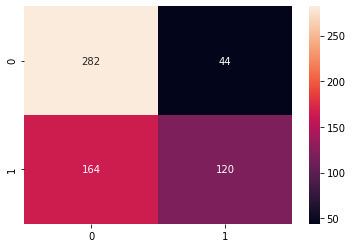

0.7 

Accuracy Score 0.6475
F1 Score 0.4557 

Confusion Matrix


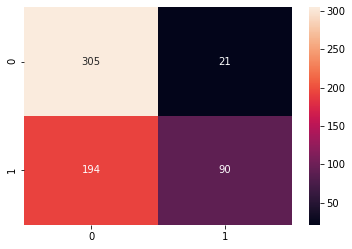

0.8 

Accuracy Score 0.6
F1 Score 0.2695 

Confusion Matrix


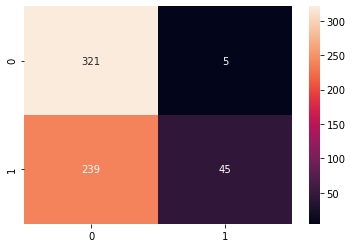

0.9 

Accuracy Score 0.5426
F1 Score 0.0346 

Confusion Matrix


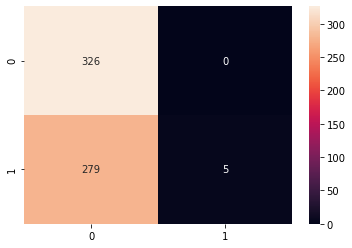

In [68]:
probs=model.predict_proba(X_train)
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(probs)[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [72]:
model.coef_

array([[-1.47549548e-05, -5.43037831e-02,  7.59653739e-02,
        -1.42854644e+00, -4.63592980e-02,  1.62390347e+00]])